In [35]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import regex as re
import nltk
  


### Intensity Scaling

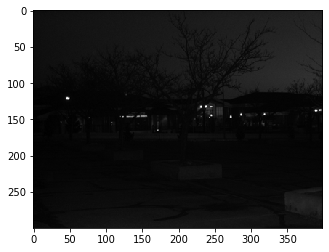

In [65]:
image = cv2.imread('image.jpg')

# Showing the original image
plt.imshow(image) 

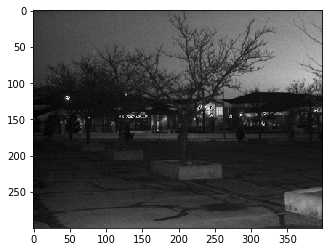

In [66]:
#Scaling by a factor of 4 and displaying the image

plt.imshow(image*4) 

### Document Similarity

In [11]:
#Defining the sentences

sentences = ["This article is really interesting", "The other article is really interesting", "This is boring"]

In [50]:
#Extracting the set of words
words_list = []

for sentence in sentences:
    sentence = sentence
    words_list.append(nltk.word_tokenize(sentence)) 

In [51]:
vocabulary = set([word for sublist in words_list for word in sublist])
print(vocabulary)

{'This', 'The', 'other', 'really', 'is', 'boring', 'interesting', 'article'}


In [55]:
#Bag of Words

X = []
for sentence in sentences:
    vector = []
    for word in vocabulary:
        if word in sentence:
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
print(X)

[[1, 0, 0, 1, 1, 0, 1, 1], [0, 1, 1, 1, 1, 0, 1, 1], [1, 0, 0, 0, 1, 1, 0, 0]]


In [56]:
#Calculate Cosine Similarity
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [57]:

print(cos_sim(X[0], X[1]))
print(cos_sim(X[1], X[2]))
print(cos_sim(X[0], X[2]))


0.7302967433402214
0.23570226039551587
0.5163977794943222


### Image Blurring

In [105]:
image = cv2.imread('suzo.jpg')
blur_filter = np.ones((7, 7), np.float)/(49.0) #kernel

#filter2D performs the convolution operation for us
image_blur = cv2.filter2D(image, -1, blur_filter)


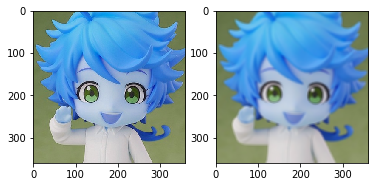

In [106]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(image_blur)

### Detecting Blur

In [107]:
#Convolving Laplacian kernel and finding variance
def detect_blur(image):
    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    print("Laplacian variance: ", fm)
    return fm



Laplacian variance:  538.8018300968197
Not Blurry


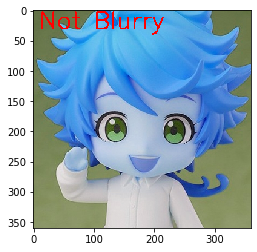

In [108]:
fm = detect_blur(image)

if fm<100:
    text = "Blurry"
else:
    text = "Not Blurry"
print(text)
cv2.putText(image, text, (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 2)
plt.imshow(image)


Laplacian variance:  6.507767473173763
Blurry


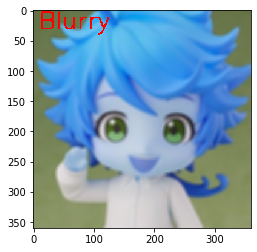

In [109]:
fm = detect_blur(image_blur)

if fm<100:
    text = "Blurry"
else:
    text = "Not Blurry"
print(text)
cv2.putText(image_blur, text, (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 2)
plt.imshow(image_blur)